In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


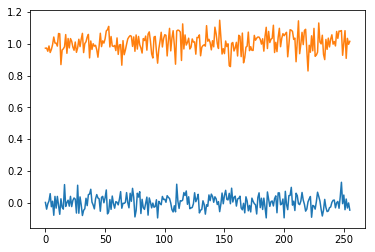

In [20]:
n_hidden = 256
X = np.random.randn(512, n_hidden)

plt.plot(X.mean(0), label="mean")
plt.plot(X.std(0)**2, label="var")

In [35]:
def elu_func(x, alpha):
    y = x.copy()
    neg_indices = x < 0
    y[neg_indices] = alpha * (np.exp(y[neg_indices]) - 1)
    return y

def selu(x):    
    # selu
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    
#     # "elu"
#     alpha = 1 # st be > 1
#     scale = 1 # this guy is more fragile
    
    return scale * elu_func(x, alpha)

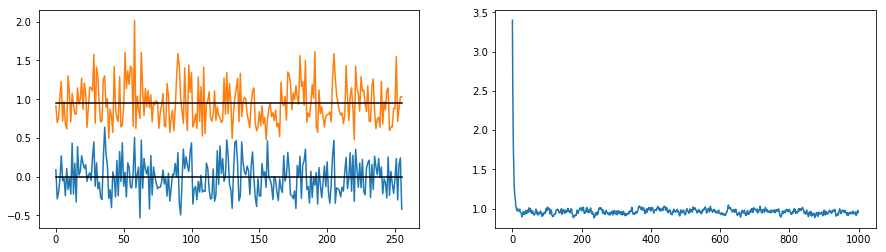

In [37]:
X = np.random.randn(512, n_hidden)*2.2
var = []

for i in range(1000):
    # normal distribution
    W = np.random.randn(n_hidden, n_hidden)/np.sqrt(n_hidden)
    X_hat = selu(X @ W)
    X = X_hat
    var.append((X_hat.var(0)).mean())

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(X_hat.mean(0), label="mean")
plt.plot(X_hat.var(0), label="var")

plt.plot((X_hat.var(0)).mean() + X_hat.mean(0)*0, 'k-', label="var")
plt.plot((X_hat.mean(0)).mean() + X_hat.mean(0)*0, 'k-', label="var")
plt.subplot(122)
plt.plot(var)

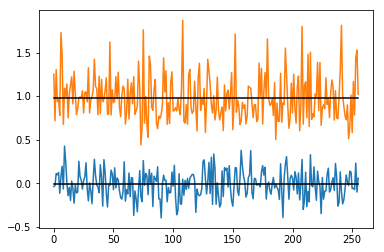

In [5]:
X = np.random.randn(512, n_hidden)*0.1

for i in range(100):
    # uniform distribution
    W = np.random.rand(n_hidden, n_hidden)
    W = W - W.mean(0)
    N = np.sqrt((W**2).sum(0))
    W = W/N
    
    X_hat = selu(X @ W)
    X = X_hat

plt.plot(X_hat.mean(0), label="mean")
plt.plot(X_hat.var(0), label="var")

plt.plot((X_hat.var(0)).mean() + X_hat.mean(0)*0, 'k-', label="var")
plt.plot((X_hat.mean(0)).mean() + X_hat.mean(0)*0, 'k-', label="var")